# Starting least-squares regression

## Introduction and definitions

In [1]:
#: Import numerical and plotting libraries
import numpy as np
# Print to four digits of precision
np.set_printoptions(precision=4, suppress=True)
import numpy.linalg as npl
import matplotlib.pyplot as plt

This exercise is to practice thinking about how the regression estimation
works, and the relationship of correlation and regression.

Here are another couple of samples of the “psychopathy” and “clamminess”
scores, of the same type that you will see in the [introduction to the general linear
model](https://textbook.nipraxis.org/glm_intro.html):


In [2]:
#: The data, that we are trying to model.
psychopathy = np.array([10.3512,  4.7685,  8.8875, 15.8477,
                        7.9221,  5.275 , 16.7839, 11.2392,
                        13.2752, 11.0242, 21.9108, 21.0303])

In [3]:
#: The regressor that we will use to model the data.
clammy = np.array([0.0552,  1.8306, -0.3534, -0.7319,
                   5.1021,  1.1133,  0.8126,  3.861,
                   6.7069,  4.3189,  4.3741,  7.2527])

In [4]:
# Number of values in psychopathy and clammy
n = len(psychopathy)

The `psychopathy` scores are scores on a psychopathy scale from a standardized
questionnaire, from 12 students.

The `clammy` scores are scores of palm skin conductance from the same 12 students.

Higher `clammy` scores correspond to a sweatier handshake.

We predict that students with higher `clammy` scores will also score higher on
the psychopathy scale.  In particular, we think there will be a linear
(straight-line) relationship between these two.

We want to find the slope and intercept for the "best" straight line to predict
`psychopathy` scores from `clammy` scores.

First do a scatter plot with `clammy` on the x-axis and `psychopathy` on the y-axis.

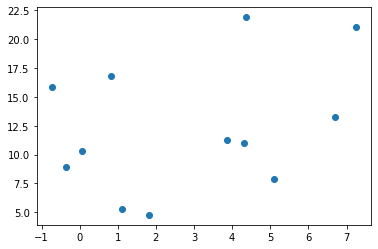

In [5]:
#- Plot psychopathy as a function of clammy
plt.scatter(clammy, psychopathy)

Before looking for the best line relating `clammy` to `psychopathy`, we will
look at the correlation coefficient between these values.

## Correlation coefficient

As you remember we calculate the correlation by first calculating standard
scores (z-scores), then taking the mean of the multiplied standard scores.

Make a function to calculate and return the standard scores from an input
array.

In [6]:
def standard_scores(v):
    """ Return standard scores from input array `v`

    Parameters
    ----------
    v : array, shape (n,)

    Returns
    -------
    z : array, shape (n,)
        Standard scores corresponding to input array `v`.
    """
    return (v - np.mean(v)) / np.std(v)

In [7]:
rng = np.random.default_rng()
# Make 20 random numbers.
my_vector = rng.normal(10, 2, size=20)
my_vector_standard = standard_scores(my_vector)
# Mean should be very close to 0
assert np.isclose(np.mean(my_vector_standard), 0)
# Standard deviation should be very close to 1
assert np.isclose(np.std(my_vector_standard), 1)
assert np.isclose(
    my_vector_standard[0],
    (my_vector[0] - np.mean(my_vector)) / np.std(my_vector))

Make a function that uses your `standard_scores` function to calculate the
correlation coefficient between two 1D arrays (vectors):

In [8]:
def corr(x, y):
    """ Pearson correlation coefficient between vectors `x`, `y`.

    Parameters
    ----------
    x : array, shape (n,)
    y : array, shape (n,)

    Returns
    -------
    r : float
        Pearson product-moment correlation coefficient between `x` and `y`.
    """
    return np.mean(standard_scores(x) * standard_scores(y))

Calculate the correlation coefficient between `clammy` and `psychopathy`.

In [9]:
r = corr(clammy, psychopathy)
# Show the result
r

0.34312759443518764

In [10]:
assert -1 <= r <= 1
assert np.isclose(r, np.corrcoef(clammy, psychopathy)[0, 1])

Make a standard scored version of `clammy`.  Call it `z_x`.

Make a standard scored version of `psychopathy`.  Call it `z_y`.

In [11]:
z_x = standard_scores(clammy)
z_y = standard_scores(psychopathy)

In [12]:
assert np.isclose(z_x[0], (clammy[0] - np.mean(clammy)) / np.std(clammy))
assert np.isclose(z_y[0], (psychopathy[0] - np.mean(psychopathy)) /
    np.std(psychopathy))
for vec in z_x, z_y:
    assert np.isclose(np.mean(vec), 0)
    assert np.isclose(np.std(vec), 1)

Do a scatterplot with `z_x` on the x-axis and `z_y` on the y-axis:

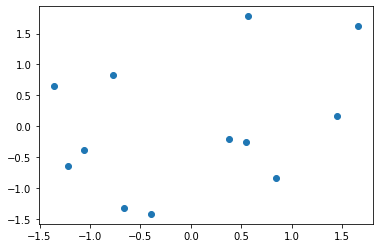

In [13]:
#- Plot z_y as a function of z_x
plt.scatter(z_x, z_y)

Here is a function to calculate the Root Mean Squared Error (RMSE) when using a given
slope and intercept to estimate values in `y`, from values in `x`.  You will
recognize it from [on regression](https://textbook.nipraxis.org/on_regression).
The only variation is that the function takes the square root of the MSE to
give the Root MSE (RMSE).

In [14]:
def calc_rmse(x, y, slope, inter):
    predicted = inter + slope * x
    errors = y - predicted
    return np.sqrt(np.mean(errors ** 2))

Calculate the RMSE for `z_x` vs `z_y`, using `r` above as the slope
and 0 as the intercept.

In [15]:
r_rmse = calc_rmse(z_x, z_y, r, 0)
# Show the result
r_rmse

0.939288802199367

Here is a selection of slopes and intercepts to try, to predict `z_y` with `z_x`.

In [16]:
slopes = np.arange(-1, 1, 0.01)
intercepts = np.arange(-1, 1, 0.01)
n_vals = len(slopes)

For every slope, intercept pair from `slopes`, `intercepts` above, calculate
the RMSE value and store it in the array `rmses`.

In [17]:
rmses = np.zeros((n_vals, n_vals))
for i in range(n_vals):  # For each slope value.
    slope = slopes[i]
    for j in range(n_vals):
        intercept = intercepts[j]
        rmses[i, j] = calc_rmse(z_x, z_y, slope, intercept)

In [18]:
assert np.all(rmses >= 0)
assert np.isclose(
    rmses[50, 61],
    calc_rmse(z_x, z_y, slopes[50], intercepts[61]))

Show the `rmses` array as a grayscale image:

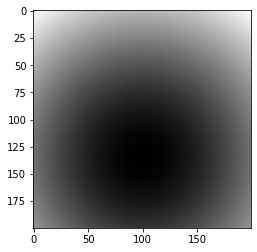

In [19]:
#- Show rmse array as an image
plt.imshow(rmses, cmap='gray')

Show that all values in `rmses` are greater than the RMSE you calculated for
slope=`r` and intercept of 0.

In [20]:
assert np.min(rmses) >= r_rmse

The fact that this is so suggests that slope=`r` and intercept of 0 are in fact
the slope, intercept pair that minimize the RMSE, when predicting `z_y` from
`z_x`.

Run the cell below to generate a plot which shows the RMSE for a selection of
the candidate slope/intercept pairs (in green) - as well as for the 
slope/intercept pair that gives the minimum RMSE (shown as a red X) - when 
predicting `z_y` from `z_x`.

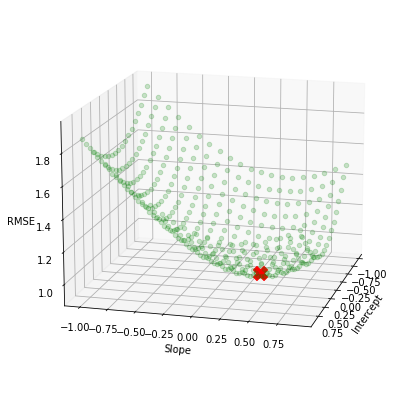

In [21]:
slopes_2 = np.arange(-1, 1, 0.1)
intercepts_2 = np.arange(-1, 1, 0.1)
less_vals = len(slopes_2)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('RMSE')
ax.view_init(elev=15, azim=15)
ax.scatter3D(0, r, calc_rmse(z_x, z_y, r, 0), color = "red", marker = 'X',
             s = 200)
 
for i in range(less_vals):  # For each slope value.
    slope = slopes_2[i]
    for j in range(less_vals):
        intercept = intercepts_2[j]
        ax.scatter3D(intercept, slope, calc_rmse(z_x, z_y, slope, intercept),
                     color = "green", alpha = 0.2);

## Regression and correlation

We have found the best straight line for predicting the psychopathy values as
standard scores, from the clammy values as standard scores.  That line has
slope `r` and intercept 0.

We now want to find the best slope and intercept to predict the original
`psychopathy` values from the original `clammy` values.

Here are some slopes and intercepts to try for the line predicting
`psychopathy` from `clammy`:

In [22]:
n_slopes = 200
orig_slopes = np.linspace(0, 1, n_slopes)
n_inters = 300
orig_intercepts = np.linspace(5, 15, n_inters) 

For every slope, intercept pair from `orig_slopes`, `orig_intercepts` above, calculate
the RMSE value and store it in the array `rmses_orig`.

In [23]:
rmses_orig = np.zeros((n_slopes, n_inters))
for i in range(n_slopes):  # For each slope value.
    slope = orig_slopes[i]
    for j in range(n_inters):
        intercept = orig_intercepts[j]
        rmses_orig[i, j] = calc_rmse(clammy, psychopathy, slope, intercept)

In [24]:
assert np.all(rmses_orig >= 0)
assert np.isclose(
    rmses_orig[50, 61],
    calc_rmse(clammy, psychopathy, orig_slopes[50], orig_intercepts[61]))

Show the `rmses_orig` array as a grayscale image:

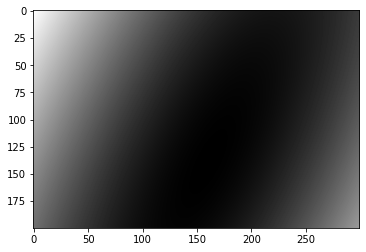

In [25]:
#- Show rmse array as an image
plt.imshow(rmses_orig, cmap='gray')

From the [on regression](https://textbook.nipraxis.org/on_regression) page, we can work out the best (least squares, least RMSE) slope from `r`, like this:

In [26]:
best_orig_slope = r * np.std(psychopathy) / np.std(clammy)
best_orig_slope

0.696254507560857

We can reconstruct the best intercept with:

In [27]:
best_orig_inter = np.mean(psychopathy) - best_orig_slope * np.mean(clammy)
best_orig_inter

10.367063172991191

This is also what we find using the Scipy linear regression function:

In [28]:
import scipy.stats as sps
res = sps.linregress(clammy, psychopathy)
res

LinregressResult(slope=0.6962545075608569, intercept=10.367063172991191, rvalue=0.34312759443518753, pvalue=0.2748657666636627, stderr=0.6027143325914797, intercept_stderr=2.3486728306373355)

Calculate the RMSE value for `clammy`, `psychopathy`, using the best slope and
intercept from the calculation above.

In [29]:
best_rmse = calc_rmse(clammy, psychopathy, best_orig_slope, best_orig_inter)
# Show the result
best_rmse

5.040909871612116

Show that all values in `rmses_orig` are greater than the RMSE you calculated for
slope=`best_slope_orig` and intercept of `best_slope_orig`.

In [30]:
assert np.min(rmses_orig) >= best_rmse

This implies that slope, intercept pair we calculated using the `r` value, or
with `scipy.stats.linregress`, does give the line minimizing the squared error
(and RMSE) when predicting `psychopathy` from `clammy`.

Run the cell below to generate a plot which shows the RMSE for a selection of
the candidate slope/intercept pairs (in green). The slope/intercept pair that
gives the minimum RMSE is shown as a red X.

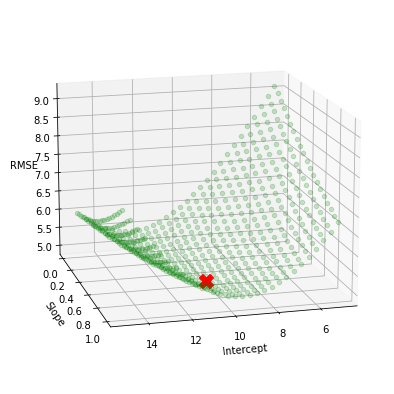

In [31]:
n_slopes = 20
orig_slopes = np.linspace(0, 1, n_slopes)
n_inters = 30
orig_intercepts = np.linspace(5, 15, n_inters) 

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('RMSE')
ax.view_init(elev=15, azim=75)
ax.scatter3D(best_orig_inter, best_orig_slope, calc_rmse(clammy, psychopathy,
            best_orig_slope, best_orig_inter), color = "red", marker = 'X',
            s = 200)
        

for i in range(n_slopes):  
    slope = orig_slopes[i]
    for j in range(n_inters):
        intercept = orig_intercepts[j]
        ax.scatter3D(intercept, slope,  calc_rmse(clammy, psychopathy, slope,
                     intercept), color = "green", alpha = 0.2);